In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

Using TensorFlow backend.


In [ ]:
# Code 2: Autoencoder, Dense Network, Three Layers (for both encoding and decoding)

In [8]:
#input_img = Input(shape=(28, 28, 1)) 
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(32,))
decoded = Dense(64, activation='sigmoid')(encoded_input)
decoded = Dense(128, activation='sigmoid')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoder = Model(encoded_input,decoded)

autoencoder = Model(input_img,decoder(encoder(input_img)))

In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [11]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [12]:
history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 24s 401us/step - loss: 0.3776 - val_loss: 0.2812
Epoch 2/50
60000/60000 [==============================] - 20s 336us/step - loss: 0.2728 - val_loss: 0.2682
Epoch 3/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.2670 - val_loss: 0.2657
Epoch 4/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.2654 - val_loss: 0.2647
Epoch 5/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.2647 - val_loss: 0.2642
Epoch 6/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.2642 - val_loss: 0.2638
Epoch 7/50
60000/60000 [==============================] - 9s 142us/step - loss: 0.2639 - val_loss: 0.2635
Epoch 8/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.2637 - val_loss: 0.2633
Epoch 9/50
60000/60000 [==============================] - 9s 153us/step - loss: 0.2634 - val_loss: 0

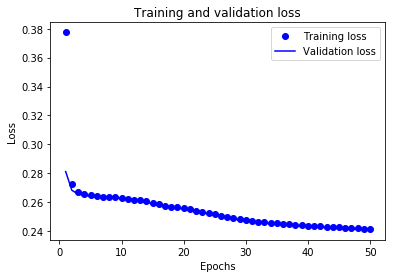

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 51)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

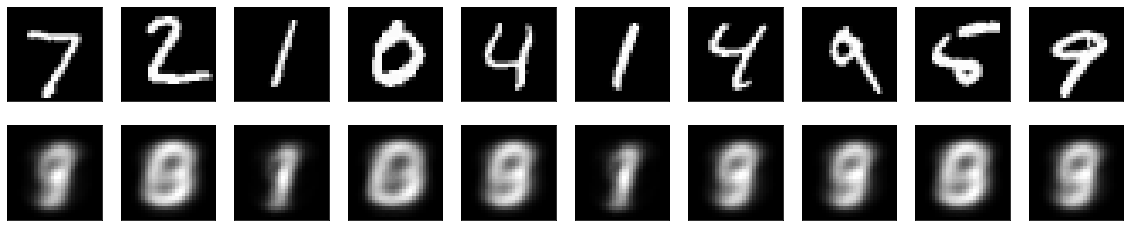

In [16]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()